In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
directory = 'images'

In [3]:
Name=[]
for file in os.listdir(directory):
    if file[-4:]!='pt.m' and file[-4:]!='.txt':
        Name+=[file]
print(Name)
print(len(Name))

['call_me', 'fingers_crossed', 'okay', 'paper', 'peace', 'rock', 'rock_on', 'scissor', 'thumbs', 'up']
10


In [4]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [5]:
File=[]
for file in os.listdir(directory):
    File+=[file]
    print(file)

call_me
fingers_crossed
okay
paper
peace
rock
rock_on
scissor
thumbs
up


In [6]:
dataset=[]
testset=[]
count=0
for file in File:
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        if im[-4:]!='pt.m' and im[-4:]!='.txt':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(60,60))
            image=img_to_array(image)
            image=image/255.0
            if t<400:
                dataset.append([image,count])
            else:   
                testset.append([image,count])
            t+=1
    count=count+1

In [7]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [8]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [9]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [12]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [13]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(3200, 60, 60, 3)
(800, 60, 60, 3)
(3200, 10)
(800, 10)


In [14]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [15]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(60,60,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [16]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(10, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=50)

Epoch 1/50
100/100 [==============================] - 118s 1s/step - loss: 0.6407 - accuracy: 0.7862 - val_loss: 0.4931 - val_accuracy: 0.8487
Epoch 2/50
100/100 [==============================] - 101s 1s/step - loss: 0.6493 - accuracy: 0.7713 - val_loss: 0.4207 - val_accuracy: 0.8775
Epoch 3/50
100/100 [==============================] - 102s 1s/step - loss: 0.6496 - accuracy: 0.7669 - val_loss: 0.4717 - val_accuracy: 0.8475
Epoch 4/50
100/100 [==============================] - 104s 1s/step - loss: 0.6283 - accuracy: 0.7884 - val_loss: 0.4301 - val_accuracy: 0.8687
Epoch 5/50
100/100 [==============================] - 103s 1s/step - loss: 0.6005 - accuracy: 0.7937 - val_loss: 0.4434 - val_accuracy: 0.8487
Epoch 6/50
100/100 [==============================] - 101s 1s/step - loss: 0.6651 - accuracy: 0.7738 - val_loss: 0.4313 - val_accuracy: 0.8562
Epoch 7/50
100/100 [==============================] - 101s 1s/step - loss: 0.6410 - accuracy: 0.7800 - val_loss: 0.4117 - val_accuracy: 0.8788

In [48]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

25/25 [==============================] - 40s 2s/step
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        71
           1       0.75      0.86      0.80        65
           2       0.87      0.99      0.93        91
           3       0.86      0.97      0.91        89
           4       0.91      0.83      0.87        84
           5       0.94      0.91      0.92        87
           6       0.93      0.88      0.90        73
           7       0.94      0.77      0.85        79
           8       0.92      0.78      0.84        83
           9       0.91      0.95      0.93        78

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.88       800
weighted avg       0.89      0.89      0.89       800



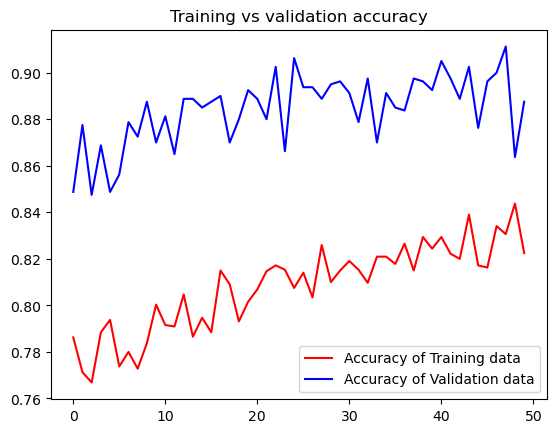

<Figure size 640x480 with 0 Axes>

In [49]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

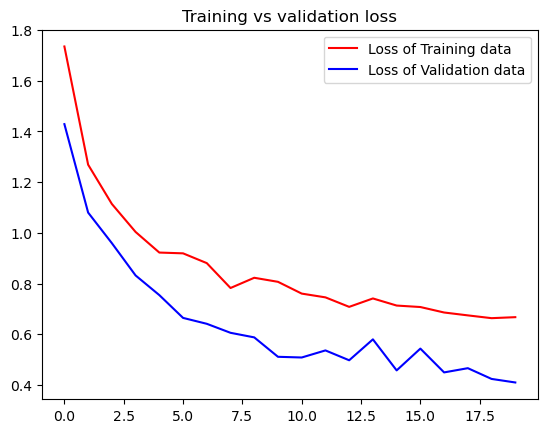

<Figure size 640x480 with 0 Axes>

In [21]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

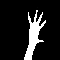

In [50]:
load_img("images/paper/1149.jpg",target_size=(60,60))

In [51]:
image=load_img("images/paper/1149.jpg",target_size=(60,60))
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [52]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 412ms/step
Prediction is Hi.


In [53]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

(1243, 60, 60, 3)
39/39 [==============================] - 62s 2s/step
(1243, 10)


In [42]:
ANS=tlabels0

In [54]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.8785197103781175


In [44]:
model.save('handgest.hdf5')
model2 = keras.models.load_model('handgest.hdf5')

In [45]:
model2 = keras.models.load_model('handgest.hdf5')

In [46]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array

model = keras.models.load_model('handgest.hdf5')

cap = cv2.VideoCapture(0)#camera

reverse_mapping = {
    0: 'call_me', 
    1: 'fingers_crossed', 
    2: 'okay', 
    3: 'Hi', 
    4: 'peace', 
    5: 'rock', 
    6: 'rock_on', 
    7: 'scissor',
    8: 'thumbs' ,
    9: 'up'
}
 # Update with  names
while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    processed_frame = cv2.resize(frame, (60, 60))  # Resize to match the model input size
    processed_frame = img_to_array(processed_frame)
    processed_frame = np.expand_dims(processed_frame, axis=0)
    processed_frame = processed_frame / 255.0  # Normalize
    
    # Predict using the model
    prediction = model.predict(processed_frame)
    pred_class = np.argmax(prediction, axis=1)[0]
    pred_label = reverse_mapping[pred_class]
    
    cv2.putText(frame, f'Prediction: {pred_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Camera', frame)#display
    

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 192ms/step
